<a href="https://colab.research.google.com/github/DeepthiManthapuram/MachineLearning-Algorithms/blob/main/Market_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Part 1 – Data Preparation
Load the dataset.
Select only numerical features relevant to customer behavior.
Handle missing values.
Standardize the data.
🔹 Part 2 – PCA Implementation
Apply PCA on the standardized dataset.
Plot the explained variance ratio.
Determine:
How many principal components are needed to retain at least 90% of total variance?
Reduce the dataset to those components.
🔹 Part 3 – Interpretation
Identify:
Which original features contribute most to PC1?
Which features dominate PC2?
Explain what PC1 and PC2 represent in business terms.
🔹 Part 4 – Practical Application
Visualize customers in 2D PCA space.
Now apply K-Means clustering on:
Original dataset
PCA-reduced dataset
Compare:
Silhouette score
Computation time
Cluster separation quality

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [11]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/marketing_campaign.csv", sep='\t')

In [12]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [14]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [15]:
features = [
    "Income", "Recency",
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds",
    "NumDealsPurchases", "NumWebPurchases",
    "NumCatalogPurchases", "NumStorePurchases",
    "NumWebVisitsMonth"
]

df_numeric = df[features]

In [16]:
df_numeric = df_numeric.fillna(df_numeric.mean())

In [17]:
# Handle missing values
df_numeric = df_numeric.fillna(df_numeric.mean())

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scaled = sc.fit_transform(df_numeric)

In [19]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
x_pca = pca.fit_transform(x_scaled)

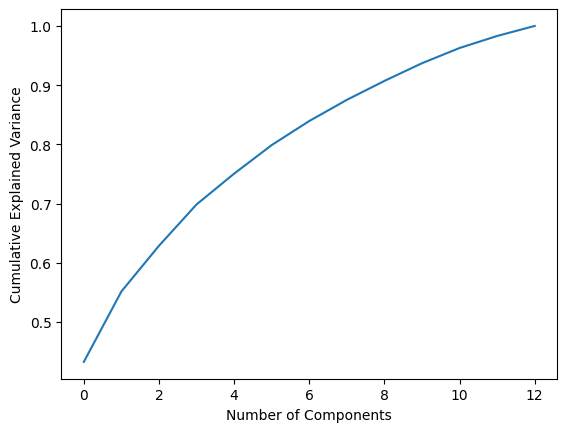

In [20]:
# Plot cumulative variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()


In [21]:
# Find components for 90% variance
cumulative = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative >= 0.90) + 1
print("Components needed for 90% variance:", n_components)

Components needed for 90% variance: 9


In [23]:
pca_final = PCA(n_components=n_components)
x_reduced = pca_final.fit_transform(x_scaled)

In [24]:
loadings = pd.DataFrame(
    pca_final.components_.T,
    columns=[f"PC{i+1}" for i in range(n_components)],
    index=features
)

print(loadings)


                          PC1       PC2       PC3       PC4       PC5  \
Income               0.316244 -0.029493 -0.016202 -0.382707 -0.001534   
Recency              0.007324 -0.022122  0.995753  0.036383 -0.024883   
MntWines             0.315722  0.223505  0.021409 -0.346651 -0.206037   
MntFruits            0.301919 -0.122428 -0.048112  0.391617  0.143426   
MntMeatProducts      0.338480 -0.127221  0.023475 -0.125982  0.304824   
MntFishProducts      0.311169 -0.134611 -0.034117  0.375434  0.151361   
MntSweetProducts     0.300859 -0.097921 -0.002522  0.369766  0.116344   
MntGoldProds         0.246359  0.195428  0.016880  0.404153 -0.425613   
NumDealsPurchases   -0.041629  0.635195  0.035573  0.038734  0.658453   
NumWebPurchases      0.232354  0.495958 -0.021700  0.039220 -0.355068   
NumCatalogPurchases  0.344482  0.011996  0.037675 -0.180163  0.233157   
NumStorePurchases    0.314037  0.189953 -0.013519 -0.171076 -0.107136   
NumWebVisitsMonth   -0.271088  0.407356 -0.009806  

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

# Original Data
start = time.time()
kmeans_orig = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans_orig.fit_predict(x_scaled)
time_orig = time.time() - start
sil_orig = silhouette_score(x_scaled, labels_orig)

# PCA Reduced Data
start = time.time()
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(x_reduced)
time_pca = time.time() - start
sil_pca = silhouette_score(x_reduced, labels_pca)

print("Original Silhouette:", sil_orig)
print("PCA Silhouette:", sil_pca)
print("Original Time:", time_orig)
print("PCA Time:", time_pca)


Original Silhouette: 0.27525674285399404
PCA Silhouette: 0.29869619823217886
Original Time: 0.05887746810913086
PCA Time: 0.009972095489501953
